In [1]:
from arms.bernoulli import BernoulliArm

arm0 = BernoulliArm(0.05)
arm1 = BernoulliArm(0.4)
arms = [arm0, arm1]


In [2]:
from arms.bernoulli import BernoulliArm
from testing_framework.tests import test_algorithm
from algorithms.epsilon_greedy.standard import EpsilonGreedy
from algorithms.softmax.annealing import AnnealingSoftmax
from algorithms.ucb.ucb1 import UCB1
import pandas as pd
import random

random.seed(42)

num_sims = 1000 # Repetitions
horizon = 250 # Number of steps in experiment
n_arms = len(arms)


# algo 1: Annealing ε-Greedy
algo1 = AnnealingSoftmax([], [])
algo1.initialize(n_arms)

# algo 2: Standard ε-Greedy (exploring 5% of the time)
algo2 = EpsilonGreedy(0.05, [], [])

# algo 3: Upper-Confidence-Bound (UCB)
algo3 = UCB1([], [])
algo3.initialize(n_arms)

algos = [("e_greedy", algo2), ("annealing_softmax", algo1), ("ucb", algo3)]

df = pd.DataFrame()
for algo in algos:
    sim_nums, times, chosen_arms, rewards, cumulative_rewards = test_algorithm(
        algo[1], 
        arms, 
        num_sims, 
        horizon
    )
    arrays = [sim_nums, times]
    index = pd.MultiIndex.from_arrays(
        arrays, names=('simulation', 'time')
    )
    df_chosen_arm = pd.DataFrame(chosen_arms, index=index, columns=[algo[0]])
    df_prob_selected = df_chosen_arm.groupby(level=1).sum() / num_sims
    df = pd.concat([df, df_prob_selected], axis=1)

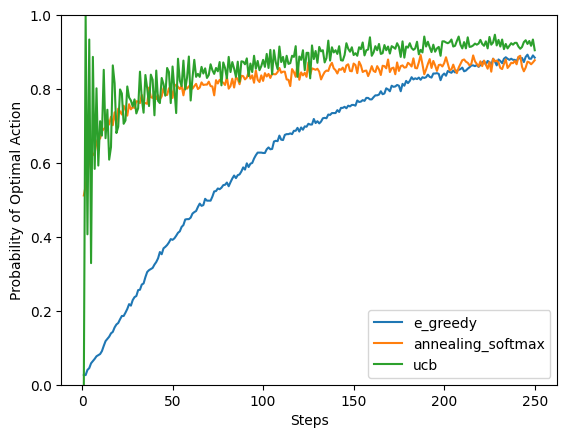

In [3]:
df.plot(ylim=[0,1], ylabel="Probability of Optimal Action",xlabel="Steps");

# Comparisons

- You can see that the ε-Greedy algorithm is taking a long time to converge to a similar level of performance. The reason being that it is still spending a large proportion of the time chossing random actions.

- The annealing version rapidly reduces the amount of random exploration to speed this learning up. This is better, but you need to tune the hyper-parameters (initial exploration rate, final exploration rate and how fast to anneal) for your specific problem.



- UCB attempts to quantify the number of times that action/state has been explored. If it has been explored a lot, and it is not the best action, then there’s little point in exploring more. This is good because there are no hyper-parameters but you’ll need to store a representation UCB attempts to quantify the number of times that action/state has been explored. If it has been explored a lot, and it is not the best action, then there’s little point in exploring more. This is good because there are no hyper-parameters but you’ll need to store visitation counts; something that might not be possible for certain problems.

